In [2]:
# Load the Fashion MNIST dataset
fmnist = tf.keras.datasets.fashion_mnist

In [3]:
# Load the training and test split of the Fashion MNIST dataset
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# You can put between 0 to 59999 here
index = 0

# Set number of characters per row when printing
np.set_printoptions(linewidth=320)

# Print the label and image
print(f'LABEL: {training_labels[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n {training_images[index]}')

# Visualize the image
plt.imshow(training_images[index])

NameError: name 'training_labels' is not defined

In [27]:
# Normalize the pixel values of the train and test images
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [28]:
# Build the classification model
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [29]:
# Declare sample inputs and convert to a tensor
inputs = np.array([[1.0, 3.0, 4.0, 2.0]])
inputs = tf.convert_to_tensor(inputs)
print(f'input to softmax function: {inputs.numpy()}')

# Feed the inputs to a softmax activation function
outputs = tf.keras.activations.softmax(inputs)
print(f'output of softmax function: {outputs.numpy()}')

# Get the sum of all values after the softmax
sum = tf.reduce_sum(outputs)
print(f'sum of outputs: {sum}')

# Get the index with highest value
prediction = np.argmax(outputs)
print(f'class with highest probability: {prediction}')

input to softmax function: [[1. 3. 4. 2.]]
output of softmax function: [[0.0320586  0.23688282 0.64391426 0.08714432]]
sum of outputs: 1.0
class with highest probability: 2


In [30]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3024 - accuracy: 0.1047
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 2.2964 - accuracy: 0.1404
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 2.2751 - accuracy: 0.1924
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 2.2356 - accuracy: 0.2207
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 2.1829 - accuracy: 0.2464


In [31]:
# Evaluate the model on unseen data
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 1ms/step - loss: 2.1546 - accuracy: 0.2242


[2.1546361446380615, 0.22419999539852142]

In [63]:
classifications = model.predict(test_images)

print(classifications[0])

313/313 [==============================] - 0s 1ms/step
[0.06698282 0.08095798 0.07378712 0.07727524 0.06557059 0.14586873 0.07702298 0.15705444 0.11531319 0.14016682]


In [61]:
print(test_labels[0])

9


In [59]:
print(training_labels[8])

5


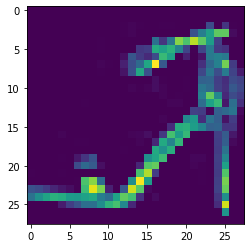

In [58]:
plt.imshow(training_images[8])